In [1]:
import sys
print (sys.path)

['', '/root/caffe/python', '/root/refer', '/root/anaconda3/lib/python36.zip', '/root/anaconda3/lib/python3.6', '/root/anaconda3/lib/python3.6/lib-dynload', '/root/anaconda3/lib/python3.6/site-packages', '/root/anaconda3/lib/python3.6/site-packages/torchvision-0.1.9-py3.6.egg', '/root/anaconda3/lib/python3.6/site-packages/IPython/extensions', '/root/.ipython']


In [2]:
%matplotlib inline
from refer import REFER
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt

# Load Refer Dataset

In [3]:
data_root = './data'  # contains refclef, refcoco, refcoco+, refcocog and images
dataset = 'refcoco'
splitBy = 'unc'
refer = REFER(data_root, dataset, splitBy)

loading dataset refcoco into memory...
creating index...
index created.
DONE (t=23.94s)


# Stats about the Dataset

In [4]:
# print stats about the given dataset
print ('dataset [%s_%s] contains: ' % (dataset, splitBy))
ref_ids = refer.getRefIds()
image_ids = refer.getImgIds()
print ('%s expressions for %s refs in %s images.' % (len(refer.Sents), len(ref_ids), len(image_ids)))

print ('\nAmong them:')
if dataset == 'refclef':
    if splitBy == 'unc':
        splits = ['train', 'val', 'testA', 'testB', 'testC']
    else:
        splits = ['train', 'val', 'test']
elif dataset == 'refcoco':
    splits = ['train', 'val', 'test']
elif dataset == 'refcoco+':
    splits = ['train', 'val', 'test']
elif dataset == 'refcocog':
    splits = ['train', 'val']  # we don't have test split for refcocog right now.
    
for split in splits:
    ref_ids = refer.getRefIds(split=split)
    print ('%s refs are in split [%s].' % (len(ref_ids), split))

dataset [refcoco_unc] contains: 
262834 expressions for 92404 refs in 36988 images.

Among them:
84808 refs are in split [train].
3811 refs are in split [val].
3785 refs are in split [test].


# Show Refered Object and its Expressions

ref_id [100000011814] (ann_id [100000588781])
1. zebra on the left
2. big zebra


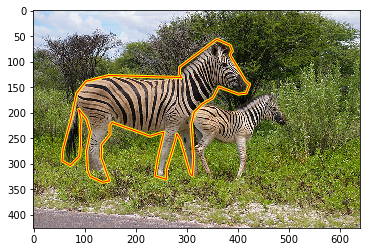

In [16]:
# randomly sample one ref
ref_ids = refer.getRefIds()
ref_id = 100000011814#ref_ids[np.random.randint(0, len(ref_ids))]
# ref_id = 11814
ref = refer.Refs[ref_id]
print ('ref_id [%s] (ann_id [%s])' % (ref_id, refer.refToAnn[ref_id]['id']))
# show the segmentation of the referred object
plt.figure()
refer.showRef(ref, seg_box='seg')
plt.show()

1. zebra on the left
2. big zebra


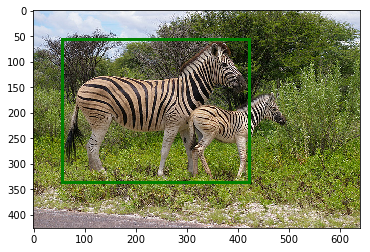

In [17]:
# or show the bounding box of the referred object
refer.showRef(ref, seg_box='box')
plt.show()

In [34]:
# let's look at the details of each ref
for sent in ref['sentences']:
    print ('sent_id[%s]: %s' % (sent['sent_id'], sent['sent']))

sent_id[100000031439]: start left side middle click left off the edge
sent_id[100000031440]: oranges
sent_id[100000031441]: top left portion of lemons


In [58]:
for ref_id, ref in refer.Refs.items():
    continue

In [60]:
len(refer.Refs.items())


92404